shape of x_train (60000, 28, 28)
shape of y_train (60000,)
shape of x_test (10000, 28, 28)
shape of y_test (10000,)


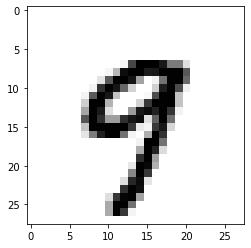

In [17]:
import tensorflow as tf
from tensorflow import keras
mnistDB=keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnistDB.load_data()
print("shape of x_train",x_train.shape)
print("shape of y_train",y_train.shape)
print("shape of x_test",x_test.shape)
print("shape of y_test",y_test.shape)
import matplotlib.pyplot as plt
plt.imshow(x_train[45],cmap='binary')



In [2]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
cnn=keras.models.Sequential()
cnn.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=x_train.shape[1:]))
cnn.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
cnn.add(keras.layers.MaxPooling2D(2,2))
cnn.add(keras.layers.Dropout(0.25))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(128,activation='relu'))
cnn.add(keras.layers.Dropout(0.25))
cnn.add(keras.layers.Dense(10,activation='relu'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [6]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn.fit(x_train,y_train,epochs=1,batch_size=16)
test_loss,test_accuracy=cnn.evaluate(x_test,y_test)
print(test_loss,test_accuracy)

313/313 [==============================] - 4s 13ms/step - loss: 2.3026 - accuracy: 0.0980
2.30259108543396 0.09799999743700027


ValueError: in user code:

    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1572, in predict_step
        return self(x, training=False)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 28, 28, 1), found shape=(None, 784)


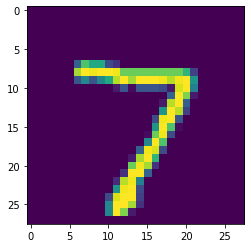

In [25]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
img = load_img('sample_image.png', grayscale = True, target_size = (28,28))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,28*28)
img = img.astype('float32')/255.0
digit = cnn.predict(img)

print(f'Digit is {digit[0]}')